## Legendre Initialization

In [11]:
from nengolib.signal import Identity, cont2discrete
from nengolib.synapses import LegendreDelay

In [2]:
from scipy.special import legendre
import numpy as np

# Creating a 4th order legendre polynomial
legendre(4)
print(np.poly1d(legendre(4)))

       4             3        2
4.375 x + 4.857e-16 x - 3.75 x + 2.429e-16 x + 0.375


/home/dorads/miniconda3/envs/sd_lmu/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  


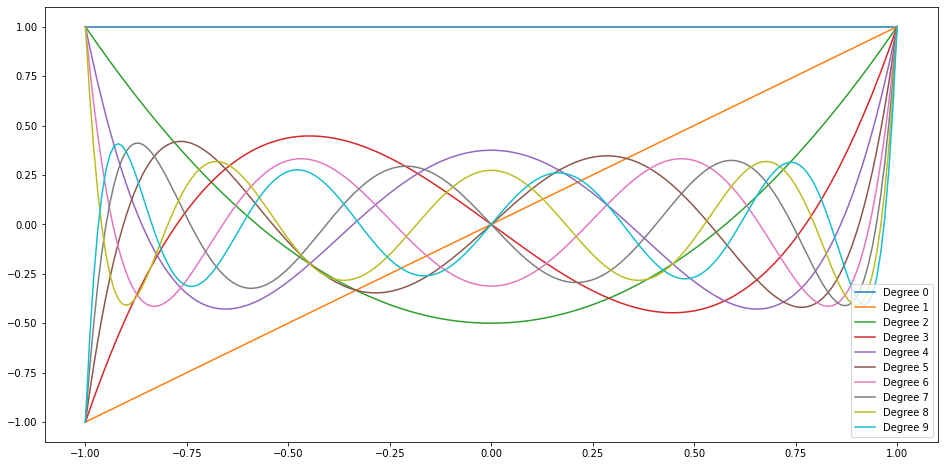

In [3]:
from scipy.special import legendre
import numpy as np
import matplotlib.pyplot as plt

max_degree = 10
n_points = 200

shape = (max_degree, n_points)
leg_poly = np.asarray([legendre(i)(np.linspace(-1, 1, shape[1]))
                           for i in range(shape[0])])

fig, axes = plt.subplots(figsize = (16,8))

t = np.linspace(-1, 1, leg_poly.shape[1])
for i in range(leg_poly.shape[0]):
    axes.plot(t, leg_poly[i,:], label = f"Degree {i}")

axes.legend();

In [10]:
def _check_order(order):
    if order < 1 or not is_integer(order):
        raise ValueError("order (%s) must be integer >= 1" % order)
    return order

def is_integer(obj):
    int_types = (int,)
    return isinstance(obj, int_types + (np.integer,))

theta = 0.5
order = 3

q = _check_order(order)

Q = np.arange(q, dtype=np.float64)
R = (2*Q + 1)[:, None] / theta
j, i = np.meshgrid(Q, Q)

A = np.where(i < j, -1, (-1.)**(i-j+1)) * R
B = (-1.)**Q[:, None] * R
C = np.ones((1, q))
D = np.zeros((1,))